# ML Homework 2022
Valentina Margiotta () 
Sara Resta (225418)

In [1]:
# Run this code to make Jupyter print every
# printable statement and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
from scipy.stats import t
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *


Importing the datasets

In [4]:
online_shoppers = pd.read_csv("data/online_shoppers_intention.csv")
training_set = pd.read_csv("data/training_set_online_shoppers_intention.csv")
test_set = pd.read_csv("data/test_set_online_shoppers_intention.csv")
online_shoppers.head()
training_set.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,3496,0,0.000000,0,0.0,5,19.000000,0.000000,0.080000,0.000000,0.6,May,2,2,1,3,Returning_Visitor,False,False
1,9415,5,158.700000,0,0.0,51,1364.266667,0.007692,0.011987,0.000000,0.0,Nov,3,2,3,2,Returning_Visitor,True,False
2,9419,7,87.916667,1,0.0,46,1621.025379,0.004082,0.020544,6.023523,0.0,Dec,1,1,3,2,Returning_Visitor,False,False
3,3837,1,4.000000,0,0.0,37,1296.942857,0.013889,NaN,0.000000,0.8,May,2,2,4,2,Returning_Visitor,False,False
4,7305,2,132.400000,0,0.0,11,296.300000,0.000000,NaN,0.000000,0.0,Sep,2,4,3,2,New_Visitor,False,False


Assign "categorical" to type of variables which are considered like that, so that they cannot be considered as "numeric"

In [ ]:
online_shoppers['Month']=online_shoppers['Month'].astype('category')
online_shoppers['OperatingSystems']=online_shoppers['OperatingSystems'].astype('category')
online_shoppers['Browser']=online_shoppers['Browser'].astype('category')
online_shoppers['Region']=online_shoppers['Region'].astype('category')
online_shoppers['TrafficType']=online_shoppers['TrafficType'].astype('category')
online_shoppers['VisitorType']=online_shoppers['VisitorType'].astype('category')
online_shoppers['Weekend']=online_shoppers['Weekend'].astype('category')

# 1. Dataset inspection and regression

## 1.1 Dataset inspection

First of all, we do some visual inspection on our data.

<AxesSubplot:xlabel='Month'>

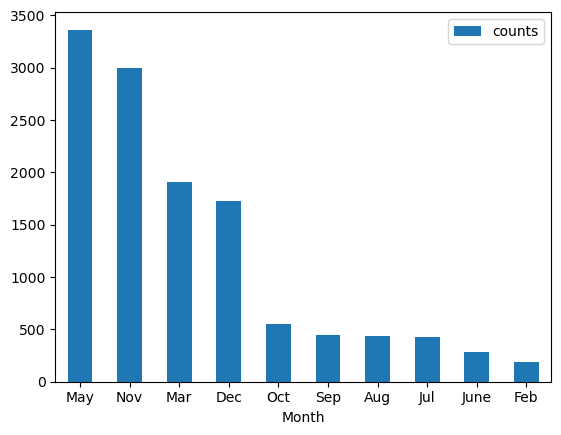

In [72]:
# Month --> categorical
#online_shoppers['Month'].unique() # 10 categories
df = pd.DataFrame({'Month':list(online_shoppers['Month'].value_counts().index), 
                   'counts':list(online_shoppers['Month'].value_counts().values)})
df.plot.bar(x='Month', y='counts', rot=0)

array([1, 2, 4, 3, 7, 6, 8, 5], dtype=int64)

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

<AxesSubplot:xlabel='Operating system'>

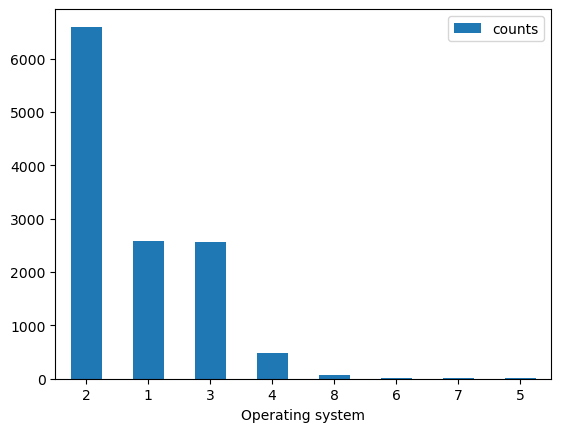

In [73]:
# OperatingSystems --> categorical
online_shoppers['OperatingSystems'].unique() # 8 categories
online_shoppers['OperatingSystems'].value_counts()
df = pd.DataFrame({'Operating system':list(online_shoppers['OperatingSystems'].value_counts().index), 
                   'counts':list(online_shoppers['OperatingSystems'].value_counts().values)})
df.plot.bar(x='Operating system', y='counts', rot=0)

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11], dtype=int64)

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

<AxesSubplot:xlabel='Browser'>

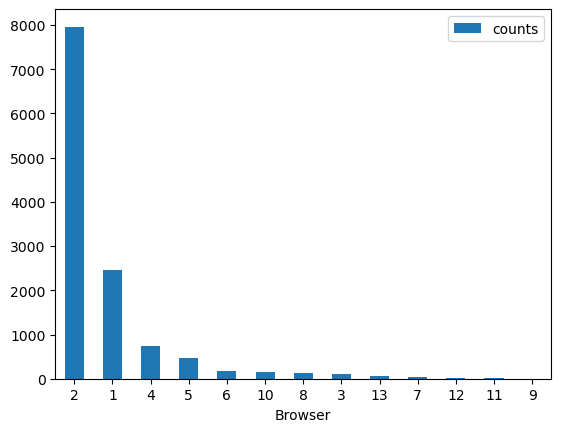

In [74]:
# Browser --> categorical
online_shoppers['Browser'].unique() # 13 categories
online_shoppers['Browser'].value_counts()
df = pd.DataFrame({'Browser':list(online_shoppers['Browser'].value_counts().index), 
                   'counts':list(online_shoppers['Browser'].value_counts().values)})
df.plot.bar(x='Browser', y='counts', rot=0)

array([1, 9, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region'>

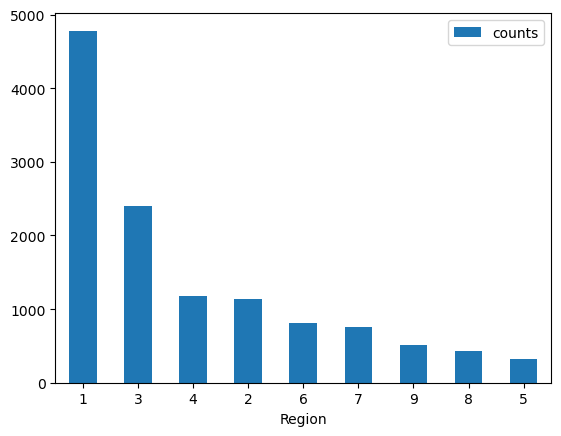

In [75]:
# Region --> categorical
online_shoppers['Region'].unique() # 9 categories
online_shoppers['Region'].value_counts()
df = pd.DataFrame({'Region':list(online_shoppers['Region'].value_counts().index), 
                   'counts':list(online_shoppers['Region'].value_counts().values)})
df.plot.bar(x='Region', y='counts', rot=0)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20], dtype=int64)

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

<AxesSubplot:xlabel='Traffic type'>

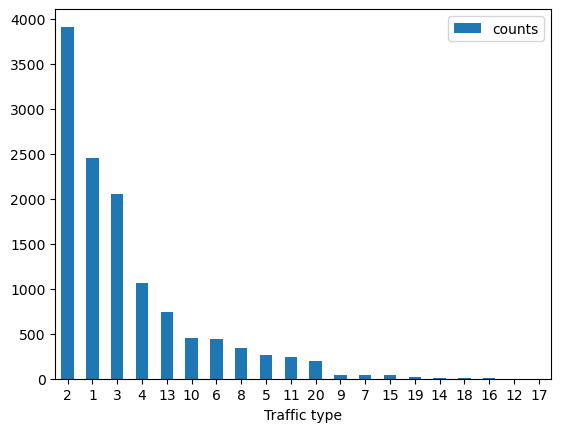

In [76]:
# TrafficType --> categorical
online_shoppers['TrafficType'].unique() # 20 categories
online_shoppers['TrafficType'].value_counts()
df = pd.DataFrame({'Traffic type':list(online_shoppers['TrafficType'].value_counts().index), 
                   'counts':list(online_shoppers['TrafficType'].value_counts().values)})
df.plot.bar(x='Traffic type', y='counts', rot=0)

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

<AxesSubplot:xlabel='Visitor type'>

<AxesSubplot:ylabel='Visitor type'>

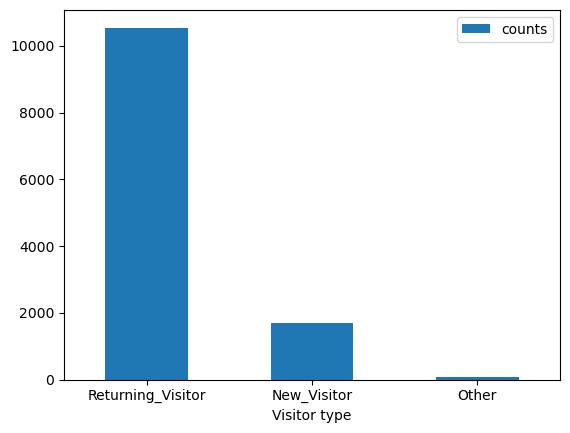

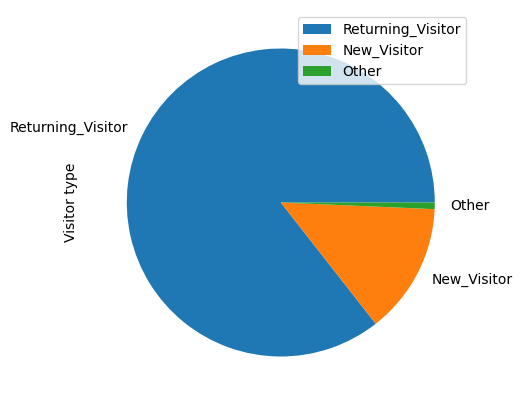

In [77]:
# VisitorType --> categorical
online_shoppers['VisitorType'].unique() # 3 categories
online_shoppers['VisitorType'].value_counts()
df_bar = pd.DataFrame({'Visitor type':list(online_shoppers['VisitorType'].value_counts().index), 
                       'counts':list(online_shoppers['VisitorType'].value_counts().values)})
df_bar.plot.bar(x='Visitor type', y='counts', rot=0)
df_pie = pd.DataFrame({'Visitor type': list(online_shoppers['VisitorType'].value_counts().values)},
                  index=list(online_shoppers['VisitorType'].value_counts().index))
df_pie.plot.pie(y='Visitor type', figsize=(5, 5))

array([False,  True])

False    9462
True     2868
Name: Weekend, dtype: int64

<AxesSubplot:xlabel='Weekend'>

<AxesSubplot:ylabel='Weekend'>

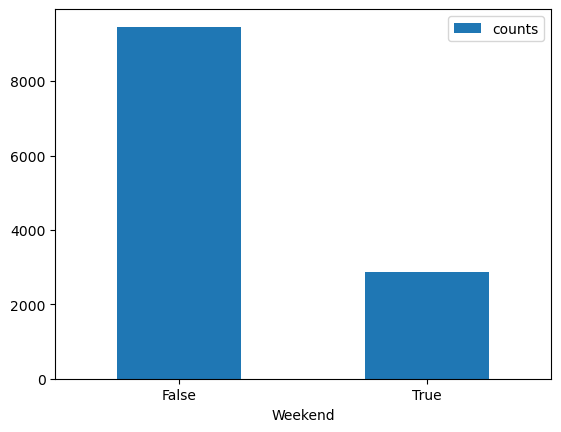

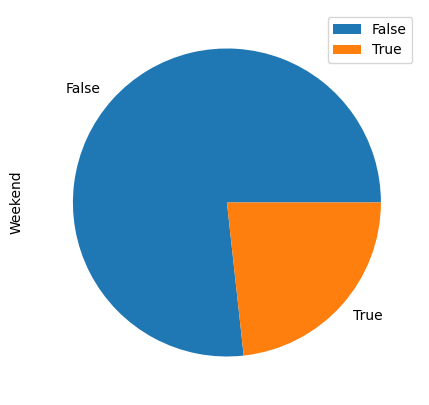

In [78]:
# Weekend --> categorical
online_shoppers['Weekend'].unique() # 2 categories (binary)
online_shoppers['Weekend'].value_counts()
df_bar = pd.DataFrame({'Weekend':list(online_shoppers['Weekend'].value_counts().index), 
                       'counts':list(online_shoppers['Weekend'].value_counts().values)})
df_bar.plot.bar(x='Weekend', y='counts', rot=0)
df_pie = pd.DataFrame({'Weekend': list(online_shoppers['Weekend'].value_counts().values)},
                  index=list(online_shoppers['Weekend'].value_counts().index))
df_pie.plot.pie(y='Weekend', figsize=(5, 5))

In [79]:
df = pd.DataFrame({'Administrative':online_shoppers['Administrative'],
                   'Administrative_Duration':online_shoppers['Administrative_Duration'],
                   'Informational':online_shoppers['Informational'],
                   'Informational_Duration':online_shoppers['Informational_Duration'],
                   'ProductRelated':online_shoppers['ProductRelated'], 
                   'ProductRelated_Duration':online_shoppers['ProductRelated_Duration'],
                   'BounceRates':online_shoppers['BounceRates'], 
                   'ExitRates':online_shoppers['ExitRates'],
                   'PageValues':online_shoppers['PageValues'], 
                   'SpecialDay':online_shoppers['SpecialDay']}) 
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


,Administrative,Informational,ProductRelated
count,12330.000000,12330.000000,12330.000000
mean,2.315166,0.503569,31.731468
std,3.321784,1.270156,44.475503
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000
50%,1.000000,0.000000,18.000000
75%,4.000000,0.000000,38.000000
max,27.000000,24.000000,705.000000


<AxesSubplot:>

(-1.0, 15.0)

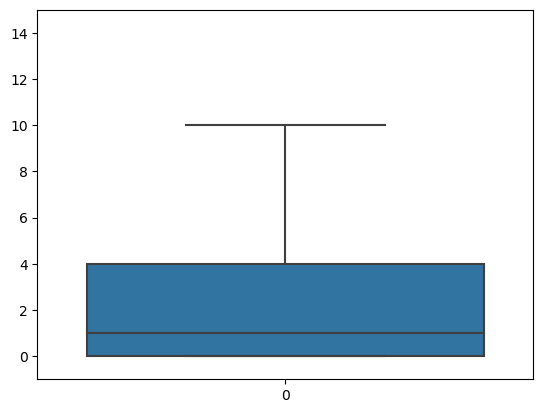

In [80]:
df = pd.DataFrame({'Administrative':online_shoppers['Administrative'], 
                   'Informational':online_shoppers['Informational'],
                   'ProductRelated':online_shoppers['ProductRelated']}) 
df.describe()
# Administrative --> continue
sns.boxplot(data=df['Administrative'], orient='v', fliersize = 0)
plt.ylim(-1, 15)
# toglie fliersize nel boxplot per visualizzare gli outliers

<AxesSubplot:>

(-1.0, 5.0)

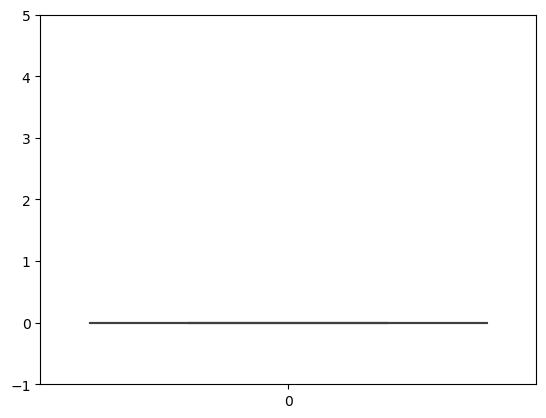

In [81]:
# Informational --> continue
sns.boxplot(data=df['Informational'], orient='v', fliersize = 0)
plt.ylim(-1, 5)

<AxesSubplot:>

(-1.0, 100.0)

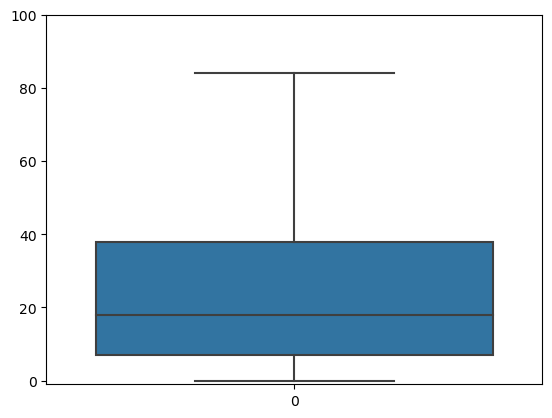

In [82]:
# ProductRelated --> continue
sns.boxplot(data=df['ProductRelated'], orient='v', fliersize = 0)
plt.ylim(-1, 100)

<AxesSubplot:>

(-10.0, 100.0)

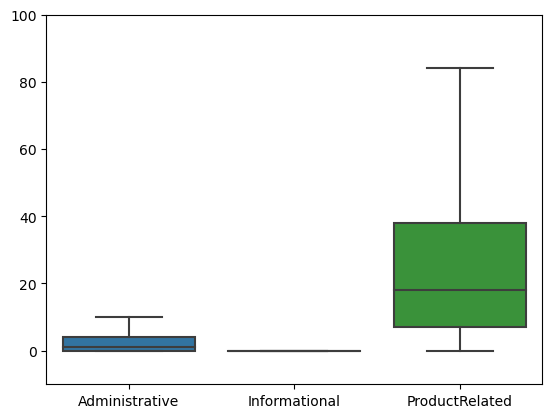

In [83]:
sns.boxplot(data=df, orient='v', fliersize = 0)
plt.ylim(-10, 100)

In [ ]:
df = pd.DataFrame({'Administrative_Duration':online_shoppers['Administrative_Duration'], 
                   'Informational_Duration':online_shoppers['Informational_Duration'],
                   'ProductRelated_Duration':online_shoppers['ProductRelated_Duration']}) 
df.describe()
# Administrative_Duration --> continue
sns.boxplot(data=df['Administrative_Duration'], orient='v', fliersize = 0)
plt.ylim(-10, 300)

In [ ]:
# Informational_Duration --> continue
sns.boxplot(data=df['Informational_Duration'], orient='v', fliersize = 0)
plt.ylim(-1, 5)

In [ ]:
# ProductRelated_Duration --> continue
sns.boxplot(data=df['ProductRelated_Duration'], orient='v', fliersize = 0)
plt.ylim(-100, 4000)

In [ ]:
sns.boxplot(data=df, orient='v', fliersize = 0)
plt.ylim(-100, 4000)

In [ ]:
df = pd.DataFrame({'BounceRates':online_shoppers['BounceRates'], 
                   'ExitRates':online_shoppers['ExitRates']}) 
df.describe()
# BounceRates and ExitRates --> continues
sns.boxplot(data=df[['BounceRates', 'ExitRates']], orient='v', fliersize=0)
plt.ylim(-1, 5)

In [ ]:
# PageValues --> continue
online_shoppers['PageValues'].describe()
sns.boxplot(data=online_shoppers['PageValues'], orient='v', fliersize=0)
plt.ylim(-1, 5)

In [ ]:
# SpecialDay --> continue
online_shoppers['SpecialDay'].describe()
sns.boxplot(data=online_shoppers['SpecialDay'], orient='v', fliersize=0)
plt.ylim(-1, 5)

We want to know which are the most correlated variables with the target class and if there is any correlation between the variables.
We start considering if there is a correlation between some variables

We firstly check if there is any correlation printing the heatmap to see if there is any correlation between the dataset features. The most correlated variables are:
* Administrative, Administrative_Duration
* Informational, Informational_Duration
* ProductRelated, ProductRelated_Duration
* BounceRates (% of visitors that leave the website without viewing any other page), ExitRates (% of visitors that leave the website from that page without purchasing)

In [ ]:
sns.heatmap(online_shoppers.corr())

Now we print a scatterplot for the pairs of variables for which we found a correlation

In [ ]:
online_shoppers.plot.scatter('Administrative','Administrative_Duration')
online_shoppers.plot.scatter('Informational','Informational_Duration')
online_shoppers.plot.scatter('ProductRelated','ProductRelated_Duration')
online_shoppers.plot.scatter('BounceRates','ExitRates')

## 1.2 Regression

In [6]:
# VisitorType -> others removed
training_set = training_set[training_set['VisitorType']!='Other']

#VisitorType -> 1 = returning, 0 = new
training_set['VisitorType'] = np.where(training_set['VisitorType']=='Returning_Visitor',1,0)

# Weekend
training_set['Weekend'] = np.where(training_set['Weekend']=='False',1,0)

# Split categorical variables
months = pd.get_dummies(training_set.Month, prefix='Month')
regions = pd.get_dummies(training_set.Region, prefix='Region')


# Looking at the other data to decide if we can set a threshold for the 'other' category
#training_set['Browser'].value_counts()
#training_set['TrafficType'].value_counts()
#training_set['OperatingSystems'].value_counts()

def cut_levels(x, threshold, new_value):
    x = x.copy()
    value_counts = x.value_counts()
    labels = value_counts.index[value_counts < threshold]
    x[np.in1d(x, labels)] = new_value
    return x

training_set['Browser'] = cut_levels(training_set['Browser'],100,'Others')
training_set['TrafficType'] = cut_levels(training_set['TrafficType'],100,'Others')
training_set['OperatingSystems'] = cut_levels(training_set['OperatingSystems'],100,'Others')

# Looking at the other data to decide if we can set a threshold for the 'other' category
training_set['Browser'].value_counts()
training_set['TrafficType'].value_counts()
training_set['OperatingSystems'].value_counts()

browser = pd.get_dummies(training_set.Browser, prefix='Browser')
traffic_type = pd.get_dummies(training_set.TrafficType, prefix='TrafficType')
operating_systems = pd.get_dummies(training_set.OperatingSystems, prefix='OperatingSystems')

2         5954
1         1821
4          559
5          356
6          136
Others     126
10         124
8          106
Name: Browser, dtype: int64

2         2963
1         1839
3         1505
4          804
13         557
10         331
6          319
8          255
5          209
11         175
Others     116
20         109
Name: TrafficType, dtype: int64

2         4934
3         1927
1         1924
4          355
Others      42
Name: OperatingSystems, dtype: int64

In [7]:
# Replacing the old categorical features with the new ones
training_set = training_set.drop(['Unnamed: 0','Month','Region','Browser','TrafficType','OperatingSystems'], axis=1).join([months,regions,browser,traffic_type,operating_systems])
training_set.shape

(9182, 57)

In [9]:
# split the training set to separate the rows with missing values
mask = training_set['ExitRates'].isna()
training_set_missing = training_set[mask]
#training_set_missing.head()
training_set_no_missing = training_set[mask==False]
#training_set_no_missing.head()

In [107]:
# Split the features of the dataset
X_all_features = list(np.delete(training_set.columns.values, [np.where(training_set.columns.values=='ExitRates'),np.where(training_set.columns.values=='Revenue')], axis=None))
#X_all_features = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','PageValues','SpecialDay','VisitorType']
#X_all_features = ['Weekend']
X = training_set_no_missing[X_all_features].to_numpy()
y = training_set_no_missing['ExitRates'].to_numpy()

In [108]:
# Fit the LinearRegression predictors

model = LinearRegression(fit_intercept=True) # 1- hyperparams selection
model = model.fit(X, y)          # 2- model fitting
#y_predict_test = model.predict(X_test)       # 3- prediction
y_predict_train = model.predict(X)


print("Train R2 score ", r2_score(y, y_predict_train))
print("Train MSE score ", mean_squared_error(y, y_predict_train))
betas = np.array([model.intercept_, *model.coef_]).reshape(-1, 1)
betas

Train R2 score  0.859778723005465
Train MSE score  0.0003226202857362456


array([[ 2.79716655e-02],
       [-9.12099077e-04],
       [-2.44409516e-06],
       [ 7.95267500e-05],
       [ 1.51349671e-06],
       [-1.16465378e-04],
       [ 5.56637339e-07],
       [ 8.64449325e-01],
       [-1.43807128e-04],
       [ 6.78246136e-03],
       [ 1.60982339e-15],
       [-3.05311332e-16],
       [-1.23425223e-03],
       [ 3.88133462e-04],
       [ 6.57798501e-04],
       [ 5.54856136e-04],
       [ 5.52494336e-03],
       [-6.94861943e-04],
       [-6.77800880e-04],
       [ 4.12527596e-05],
       [-2.07837979e-03],
       [-2.48168936e-03],
       [ 5.75895008e-04],
       [-7.10637714e-04],
       [ 9.29056890e-04],
       [ 3.84798506e-04],
       [ 1.38104430e-05],
       [-6.60042646e-04],
       [-1.47664751e-03],
       [-7.13873362e-04],
       [ 1.65764039e-03],
       [ 1.69260119e-04],
       [-3.99508616e-04],
       [-7.35689901e-05],
       [-5.81347998e-04],
       [ 5.00938434e-04],
       [ 1.01896919e-03],
       [-2.50729726e-03],
       [ 1.8

In [102]:
# Computes coefficient statistcs
def show_stats(X, y, betas, names, alpha=None):
    n_samples, n_features = X.shape
    deg = n_samples-n_features
    
    # If the ones column has not been added
    if X.shape[1] + 1 == betas.shape[0]:
        X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    #print(X)
    # Compute the prediction
    pred = X.dot(betas).reshape(-1)
    betas = betas.reshape(-1)
    y = y.reshape(-1)
    RSE = ((y-pred)**2).sum()/(n_samples - n_features)

    # Compute the t statistics
    se2_b = RSE*(np.linalg.inv(np.dot(X.T, X)).diagonal())
    print(se2_b)
    se_b = np.sqrt(se2_b)
    t_stat_b = (betas - 0) / se_b

    # Compute the p-value
    p_values = np.array([2*t.sf(np.abs(t_stat), deg) for t_stat in t_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = se_b
    df["t-stat"] = t_stat_b
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    RSS = np.sum((y - pred)**2)
    MSE = RSS/y.shape[0]
    #print("RSS: {}".format(RSS))
    
    return df

In [103]:
show_stats(X, y, betas, ['Intercept', *X_all_features], alpha=0.001)

LinAlgError: Singular matrix